In [1]:
import numpy as np
import matplotlib.pyplot as plt
from paths import *
import IPython

In [2]:
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 18

In [3]:
NAME_OF_EXPERIMENT = "6_18_dropout_1_layer"
OUTPUT_FOLDER = GENERAL_RESULTS_FOLDER+NAME_OF_EXPERIMENT+"/" # don't forget the /

In [4]:
data = np.load(OUTPUT_FOLDER+PREDICTING_FHAT_ACCURACIES_DATA_PATH, allow_pickle=True) 

In [5]:
IPython.display.display(data)

array([{'parameters': {'input_size': 50, 'learning_rate': 0.001, 'training_steps': 5000, 'display_step': 1000, 'layers': [(32, <function sigmoid at 0x7fd9de7eb5e0>), (4, None)], 'dropout': None, 'resample_data': False, 'resampled_points_per_category': None}, 'all_accuracies': {'traintotal': 92.6540283203125, 'train0': 98.70043182373047, 'train1': 12.023983669281005, 'train2': 98.20919036865234, 'train3': 15.134934997558593, 'testtotal': 70.72669677734375, 'test0': 81.47625274658203, 'test1': 1.602830410003662, 'test2': 66.40515441894532, 'test3': 0.0}, 'all_losses': {'traintotal': 0.1403605431318283, 'train0': 0.07192277908325195, 'train1': 1.0909565925598144, 'train2': 0.060314149409532544, 'train3': 1.2211588382720948, 'testtotal': 0.8511973977088928, 'test0': 0.522169029712677, 'test1': 2.3261931419372557, 'test2': 1.046602976322174, 'test3': 3.48443341255188}},
       {'parameters': {'input_size': 50, 'learning_rate': 0.001, 'training_steps': 5000, 'display_step': 1000, 'layers': [

In [6]:
def plot(title, xaxis, yaxis, keepfunction, xfunction, yfunctions, ylabels):
    filtered_data = list(filter(keepfunction, data))
    
    for yfunction in yfunctions:
        xys = []
        ys = []
        for d in filtered_data:
            x = xfunction(d)
            y = yfunction(d)
            if x is None:
                x = 0
            xys.append((x, y))
        xys_sorted = sorted(xys, key=lambda xy: xy[0])
        xs, ys = zip(*xys_sorted)
        plt.plot(xs, ys)
    plt.gca().legend(ylabels)
    plt.gcf().set_size_inches(18.5, 10.5)
    plt.xlabel(xaxis) # X AXIS
    plt.ylabel(yaxis) # Y AXIS    
    plt.title(title)

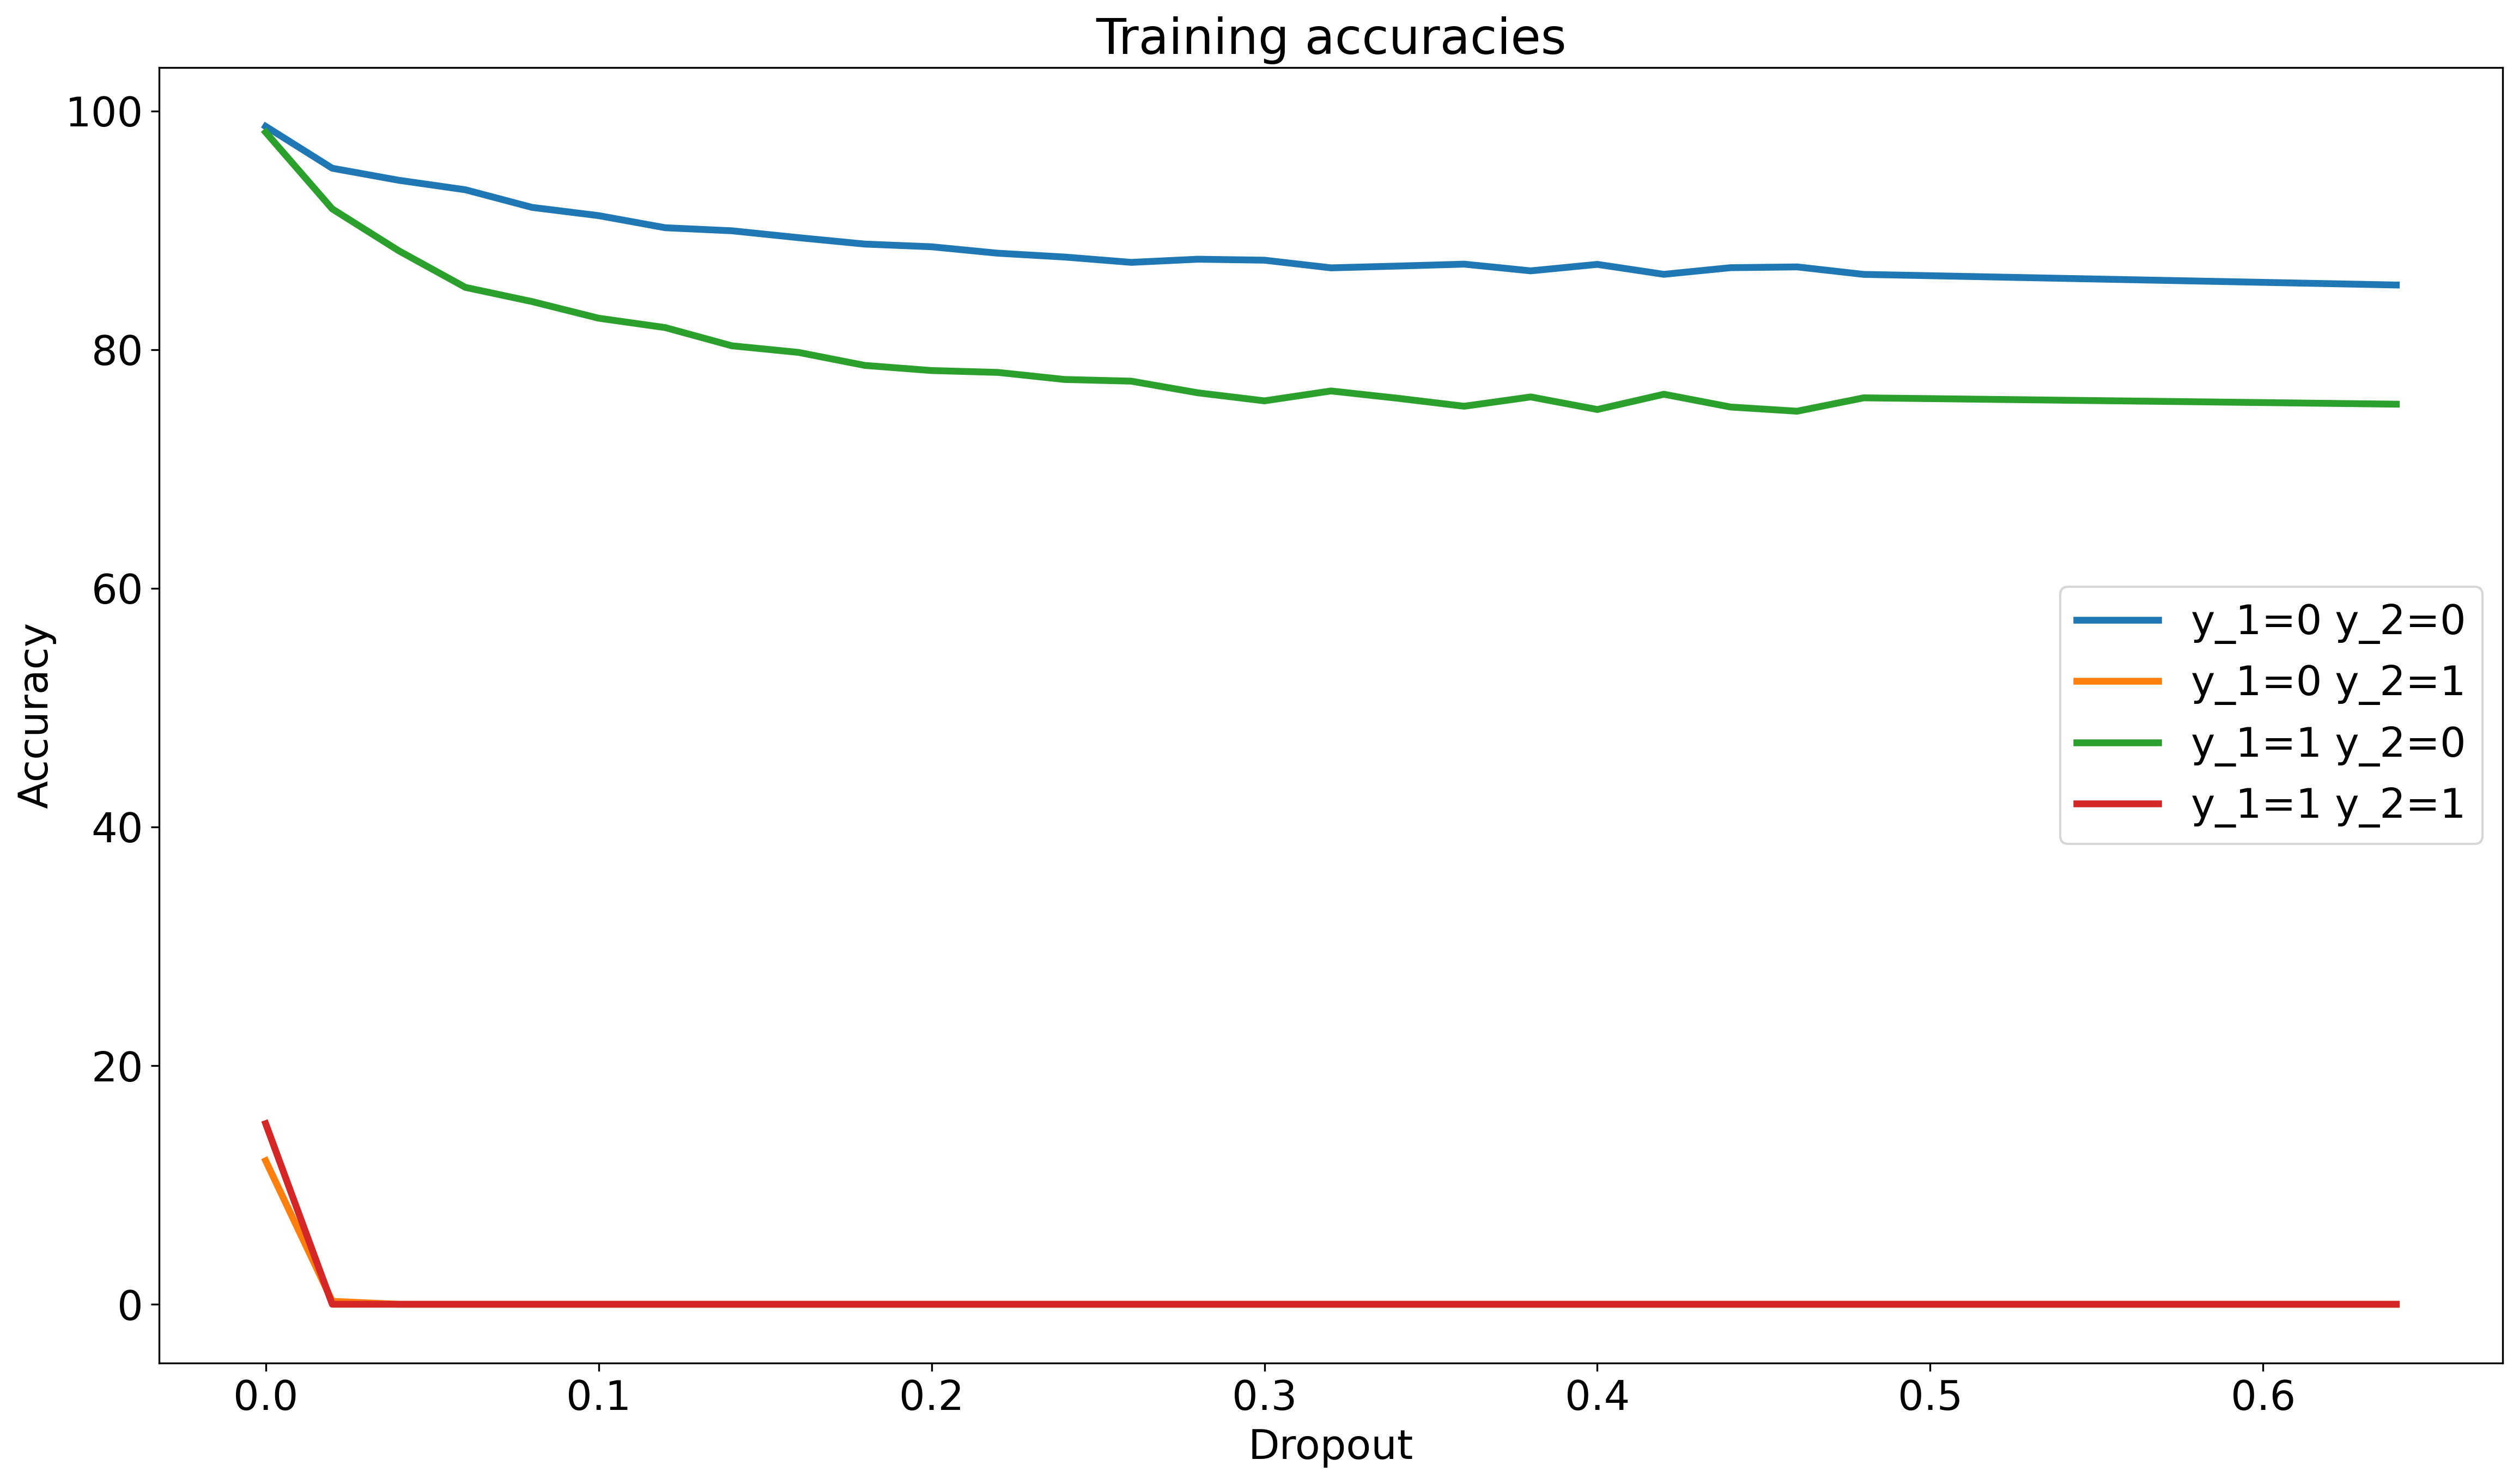

In [7]:
plot(
    title="Training accuracies",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Accuracy",
    keepfunction=lambda _: True,
    #xfunction=lambda d: d["parameters"]["layers"][0][0], # d["parameters"]["dropout"]
    xfunction=lambda d: d["parameters"]["dropout"], # d["parameters"]["dropout"]
    yfunctions=[
        lambda d: d["all_accuracies"]["train0"],
        lambda d: d["all_accuracies"]["train1"],
        lambda d: d["all_accuracies"]["train2"],
        lambda d: d["all_accuracies"]["train3"],
    ],
    ylabels=[
        "y_1=0 y_2=0",
        "y_1=0 y_2=1",
        "y_1=1 y_2=0",
        "y_1=1 y_2=1",
    ]
)

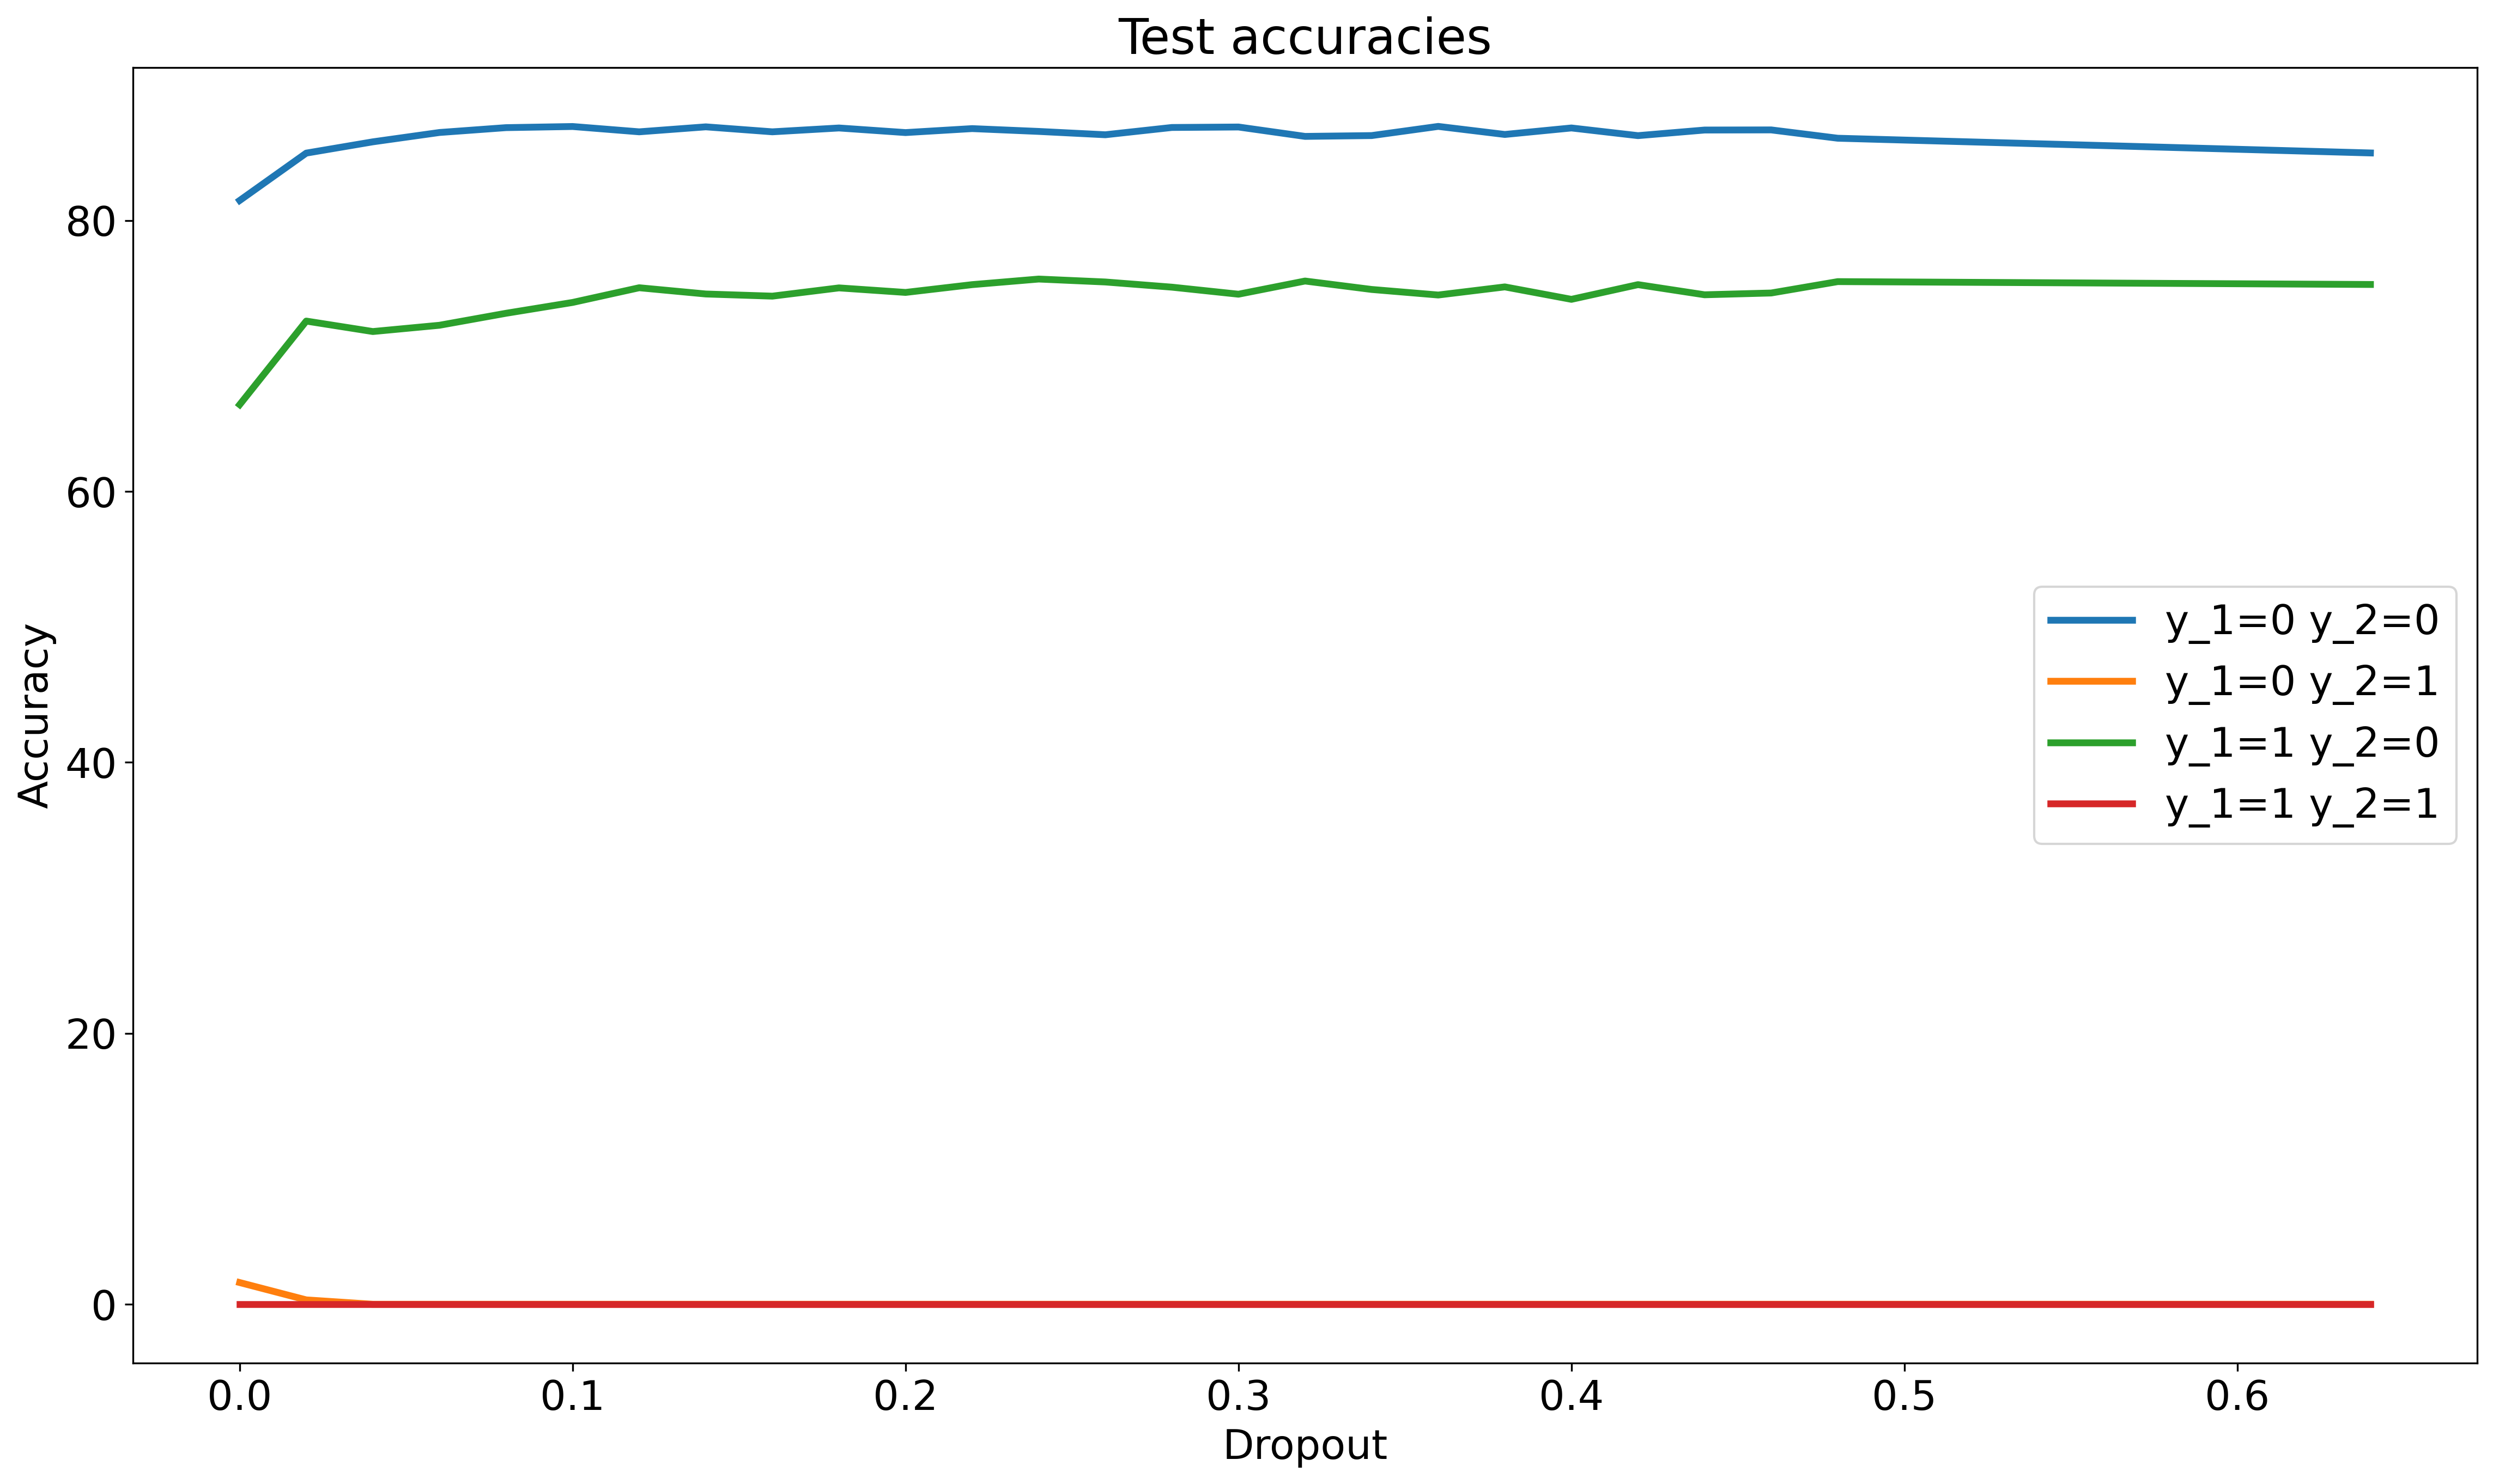

In [8]:
plot(
    title="Test accuracies",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Accuracy",
    keepfunction=lambda _: True,
    #xfunction=lambda d: d["parameters"]["layers"][0][0],
    xfunction=lambda d: d["parameters"]["dropout"], # d["parameters"]["dropout"]
    yfunctions=[
        lambda d: d["all_accuracies"]["test0"],
        lambda d: d["all_accuracies"]["test1"],
        lambda d: d["all_accuracies"]["test2"],
        lambda d: d["all_accuracies"]["test3"],
    ],
    ylabels=[
        "y_1=0 y_2=0",
        "y_1=0 y_2=1",
        "y_1=1 y_2=0",
        "y_1=1 y_2=1",
    ]
)

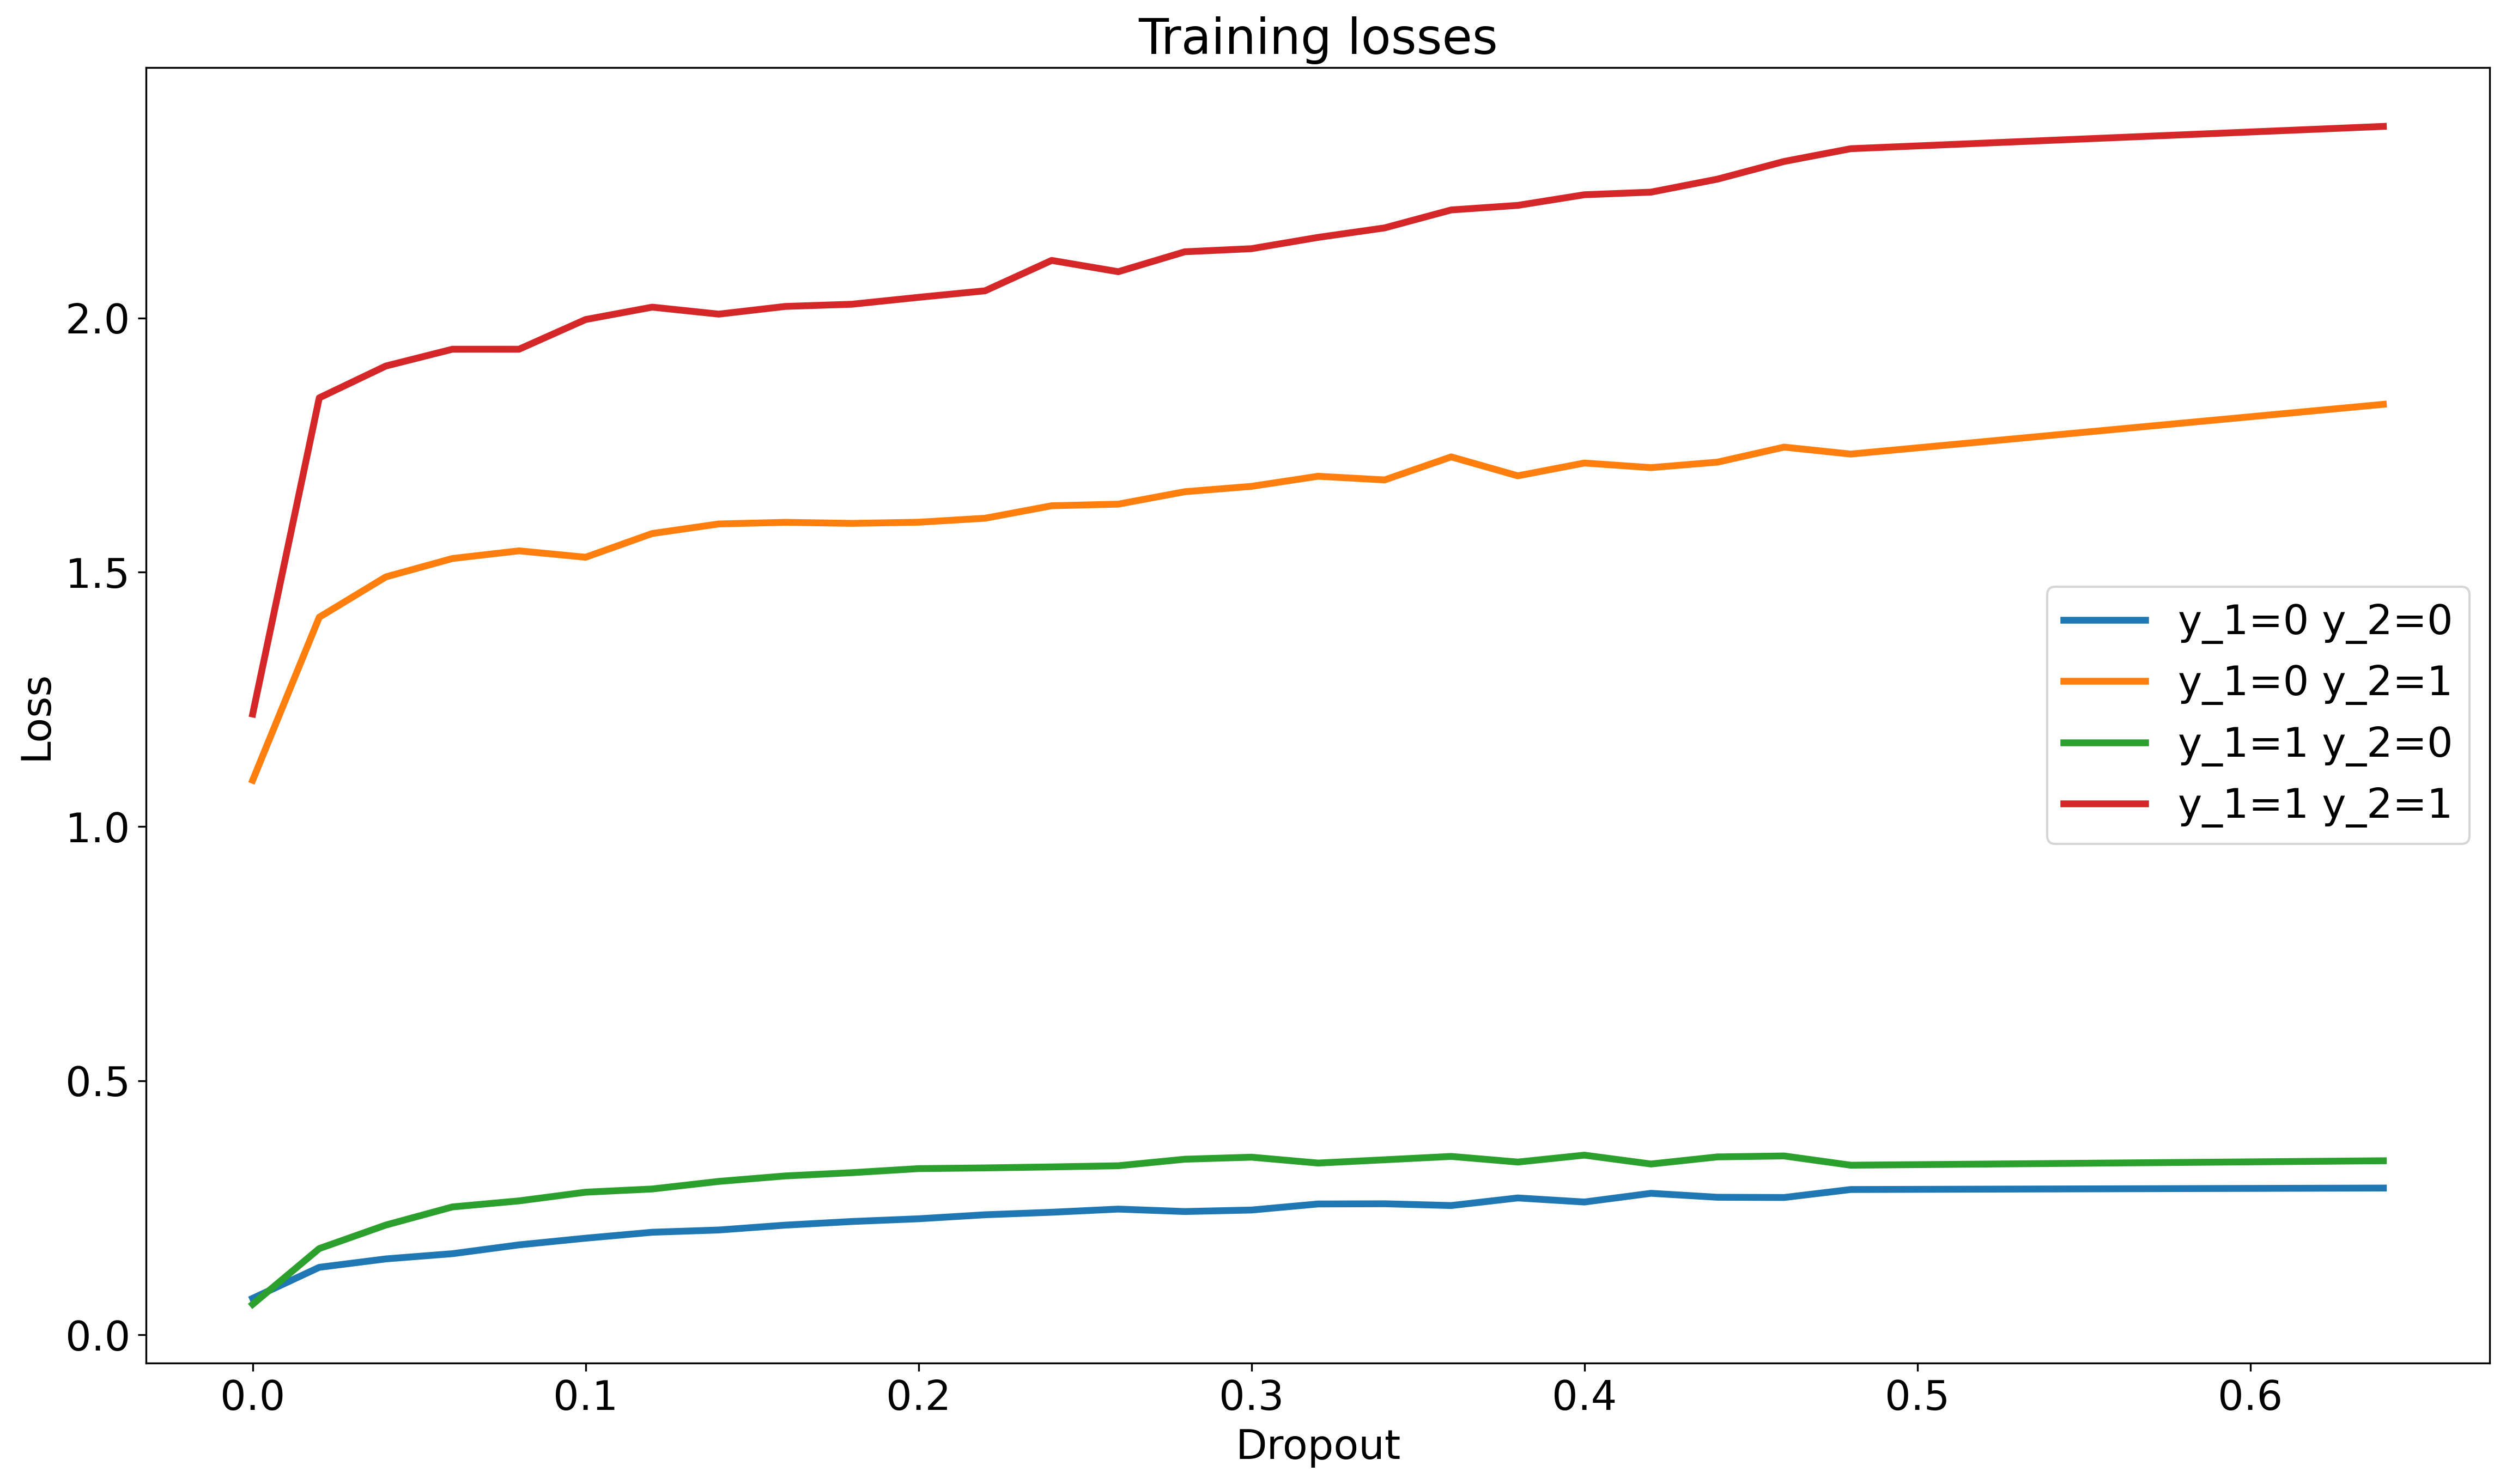

In [9]:
plot(
    title="Training losses",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Loss",
    keepfunction=lambda _: True,
    #xfunction=lambda d: d["parameters"]["layers"][0][0],
    xfunction=lambda d: d["parameters"]["dropout"], # d["parameters"]["dropout"]
    yfunctions=[
        lambda d: d["all_losses"]["train0"],
        lambda d: d["all_losses"]["train1"],
        lambda d: d["all_losses"]["train2"],
        lambda d: d["all_losses"]["train3"],
    ],
    ylabels=[
        "y_1=0 y_2=0",
        "y_1=0 y_2=1",
        "y_1=1 y_2=0",
        "y_1=1 y_2=1",
    ]
)

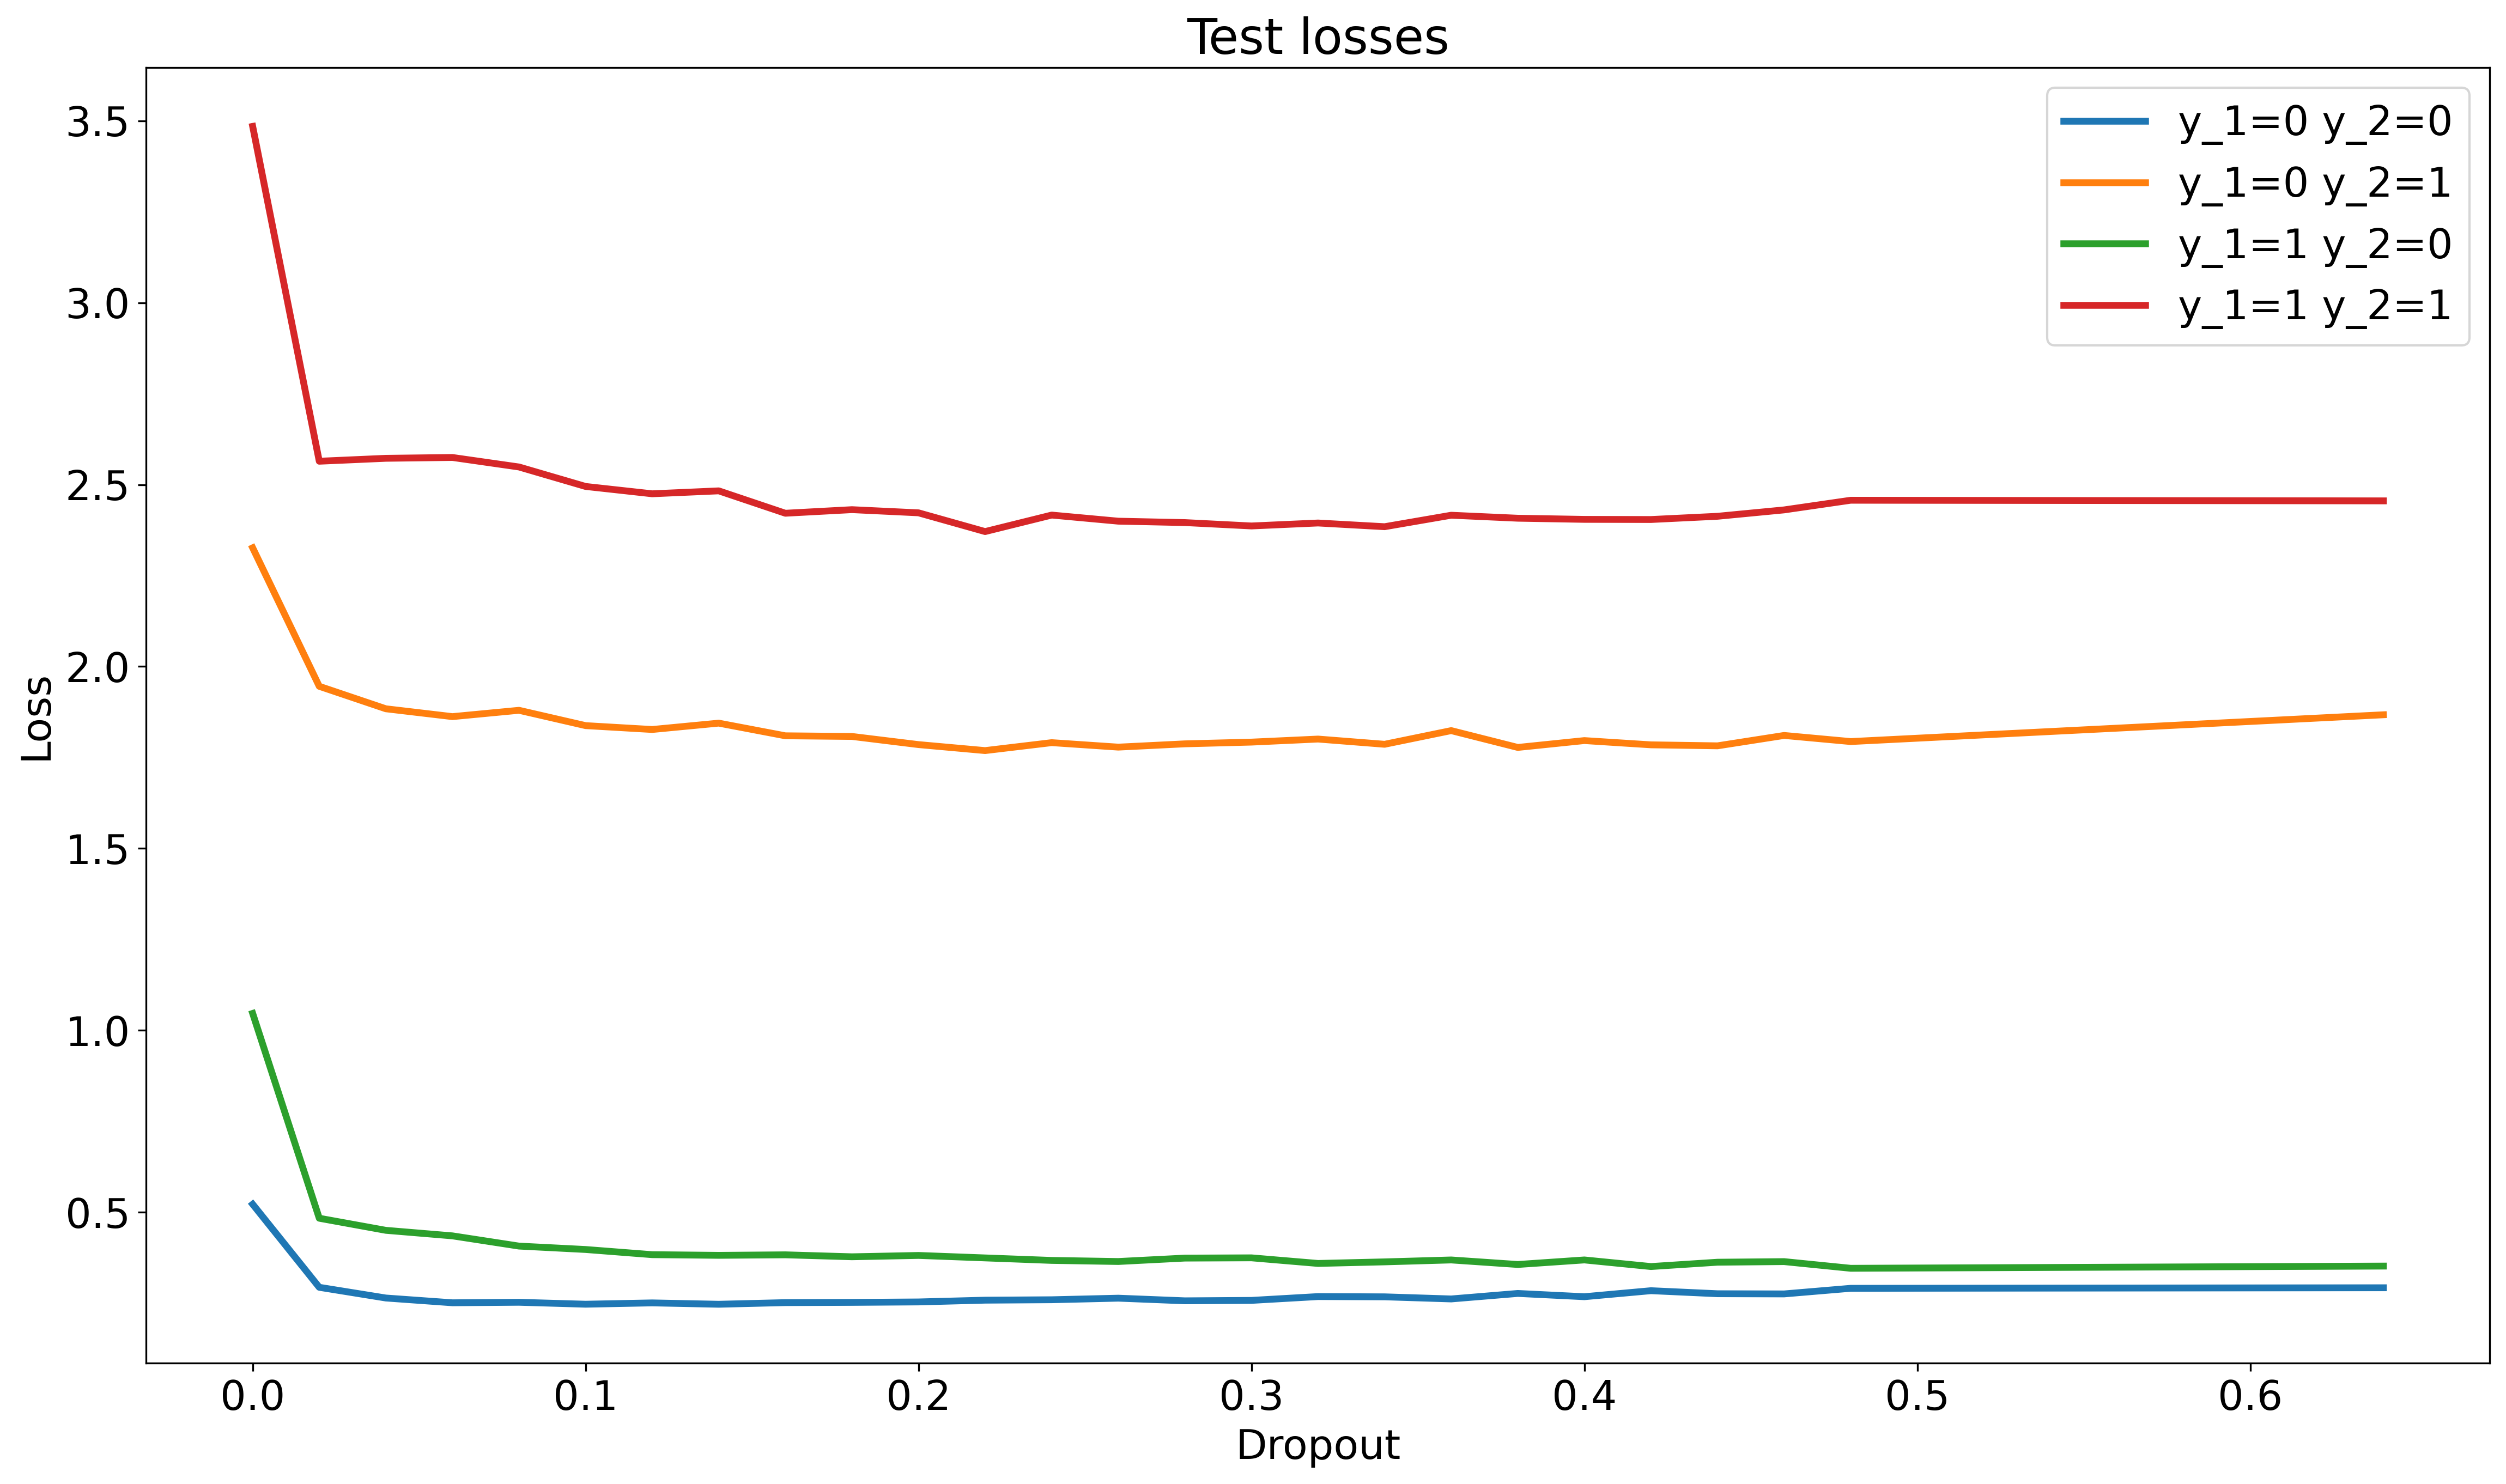

In [10]:
plot(
    title="Test losses",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Loss",
    keepfunction=lambda _: True,
    #xfunction=lambda d: d["parameters"]["layers"][0][0],
    xfunction=lambda d: d["parameters"]["dropout"], # d["parameters"]["dropout"]
    yfunctions=[
        lambda d: d["all_losses"]["test0"],
        lambda d: d["all_losses"]["test1"],
        lambda d: d["all_losses"]["test2"],
        lambda d: d["all_losses"]["test3"],
    ],
    ylabels=[
        "y_1=0 y_2=0",
        "y_1=0 y_2=1",
        "y_1=1 y_2=0",
        "y_1=1 y_2=1",
    ]
)

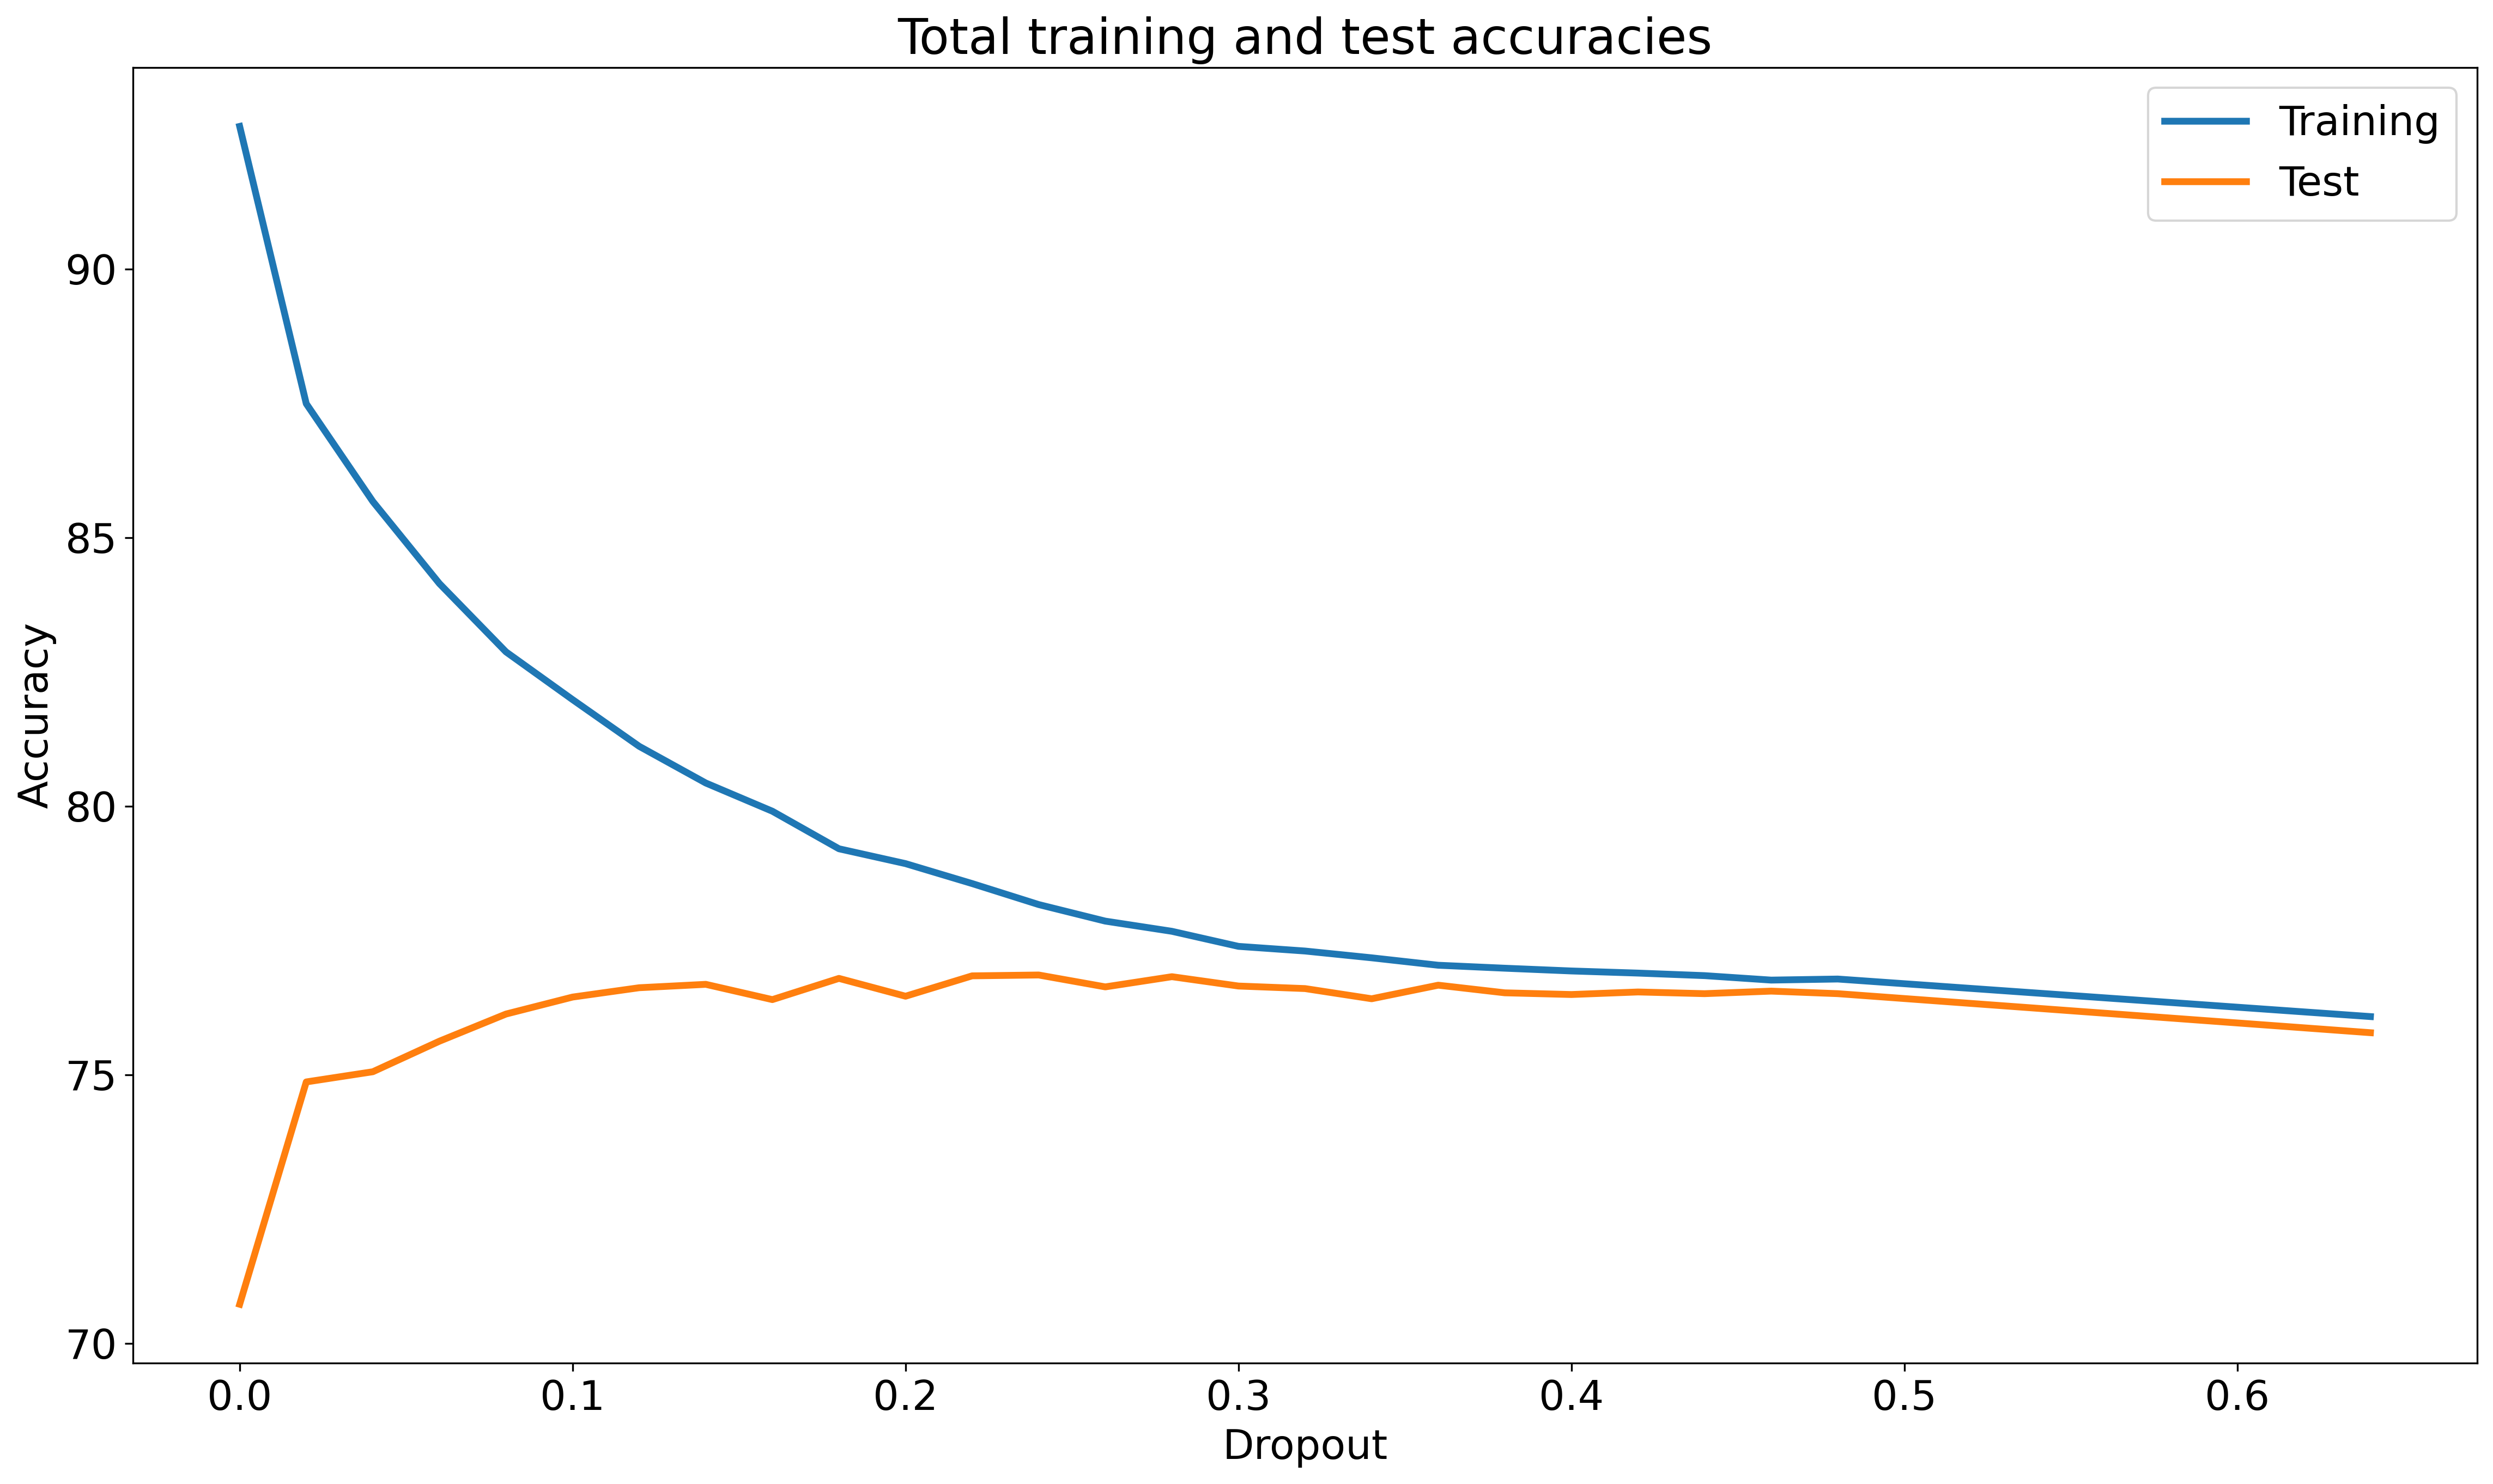

In [11]:
plot(
    title="Total training and test accuracies",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Accuracy",
    keepfunction=lambda _: True,
    #xfunction=lambda d: d["parameters"]["layers"][0][0],
    xfunction=lambda d: d["parameters"]["dropout"], # d["parameters"]["dropout"]
    yfunctions=[
        lambda d: d["all_accuracies"]["traintotal"],
        lambda d: d["all_accuracies"]["testtotal"],
    ],
    ylabels=[
        "Training",
        "Test",
    ]
)

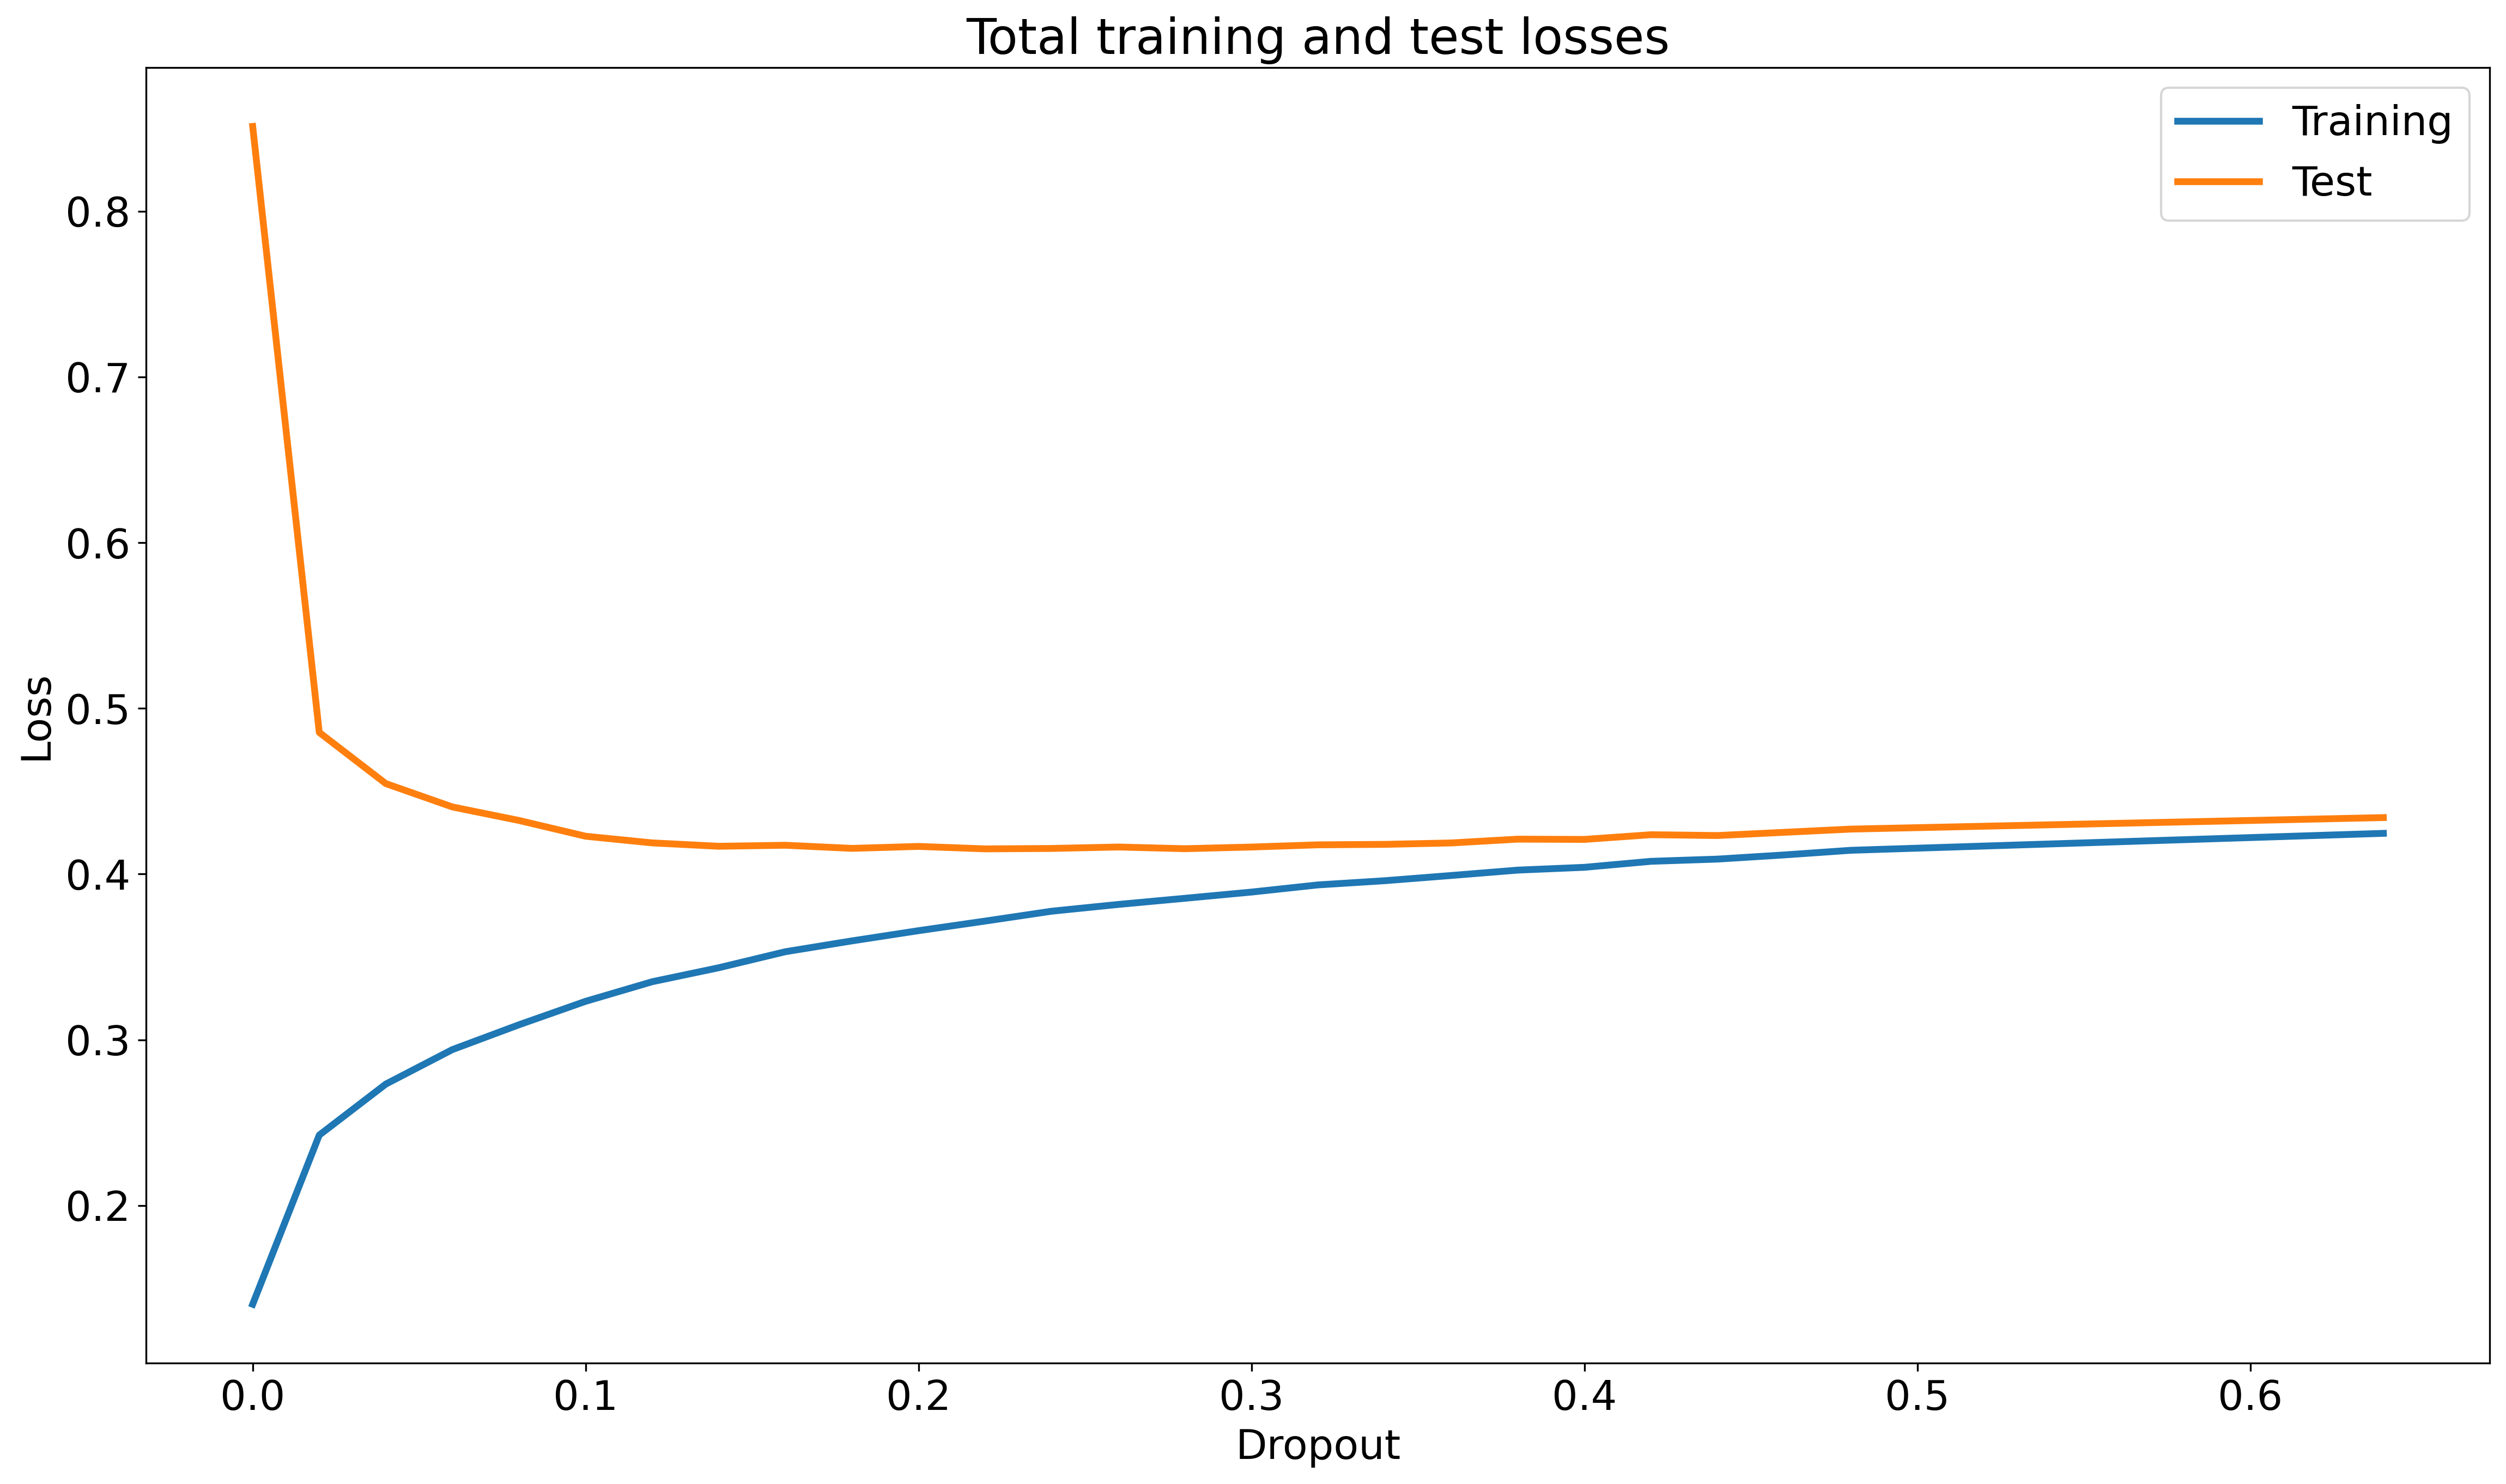

In [12]:
plot(
    title="Total training and test losses",
    #xaxis="Layer size",
    xaxis="Dropout",
    yaxis="Loss",
    keepfunction=lambda d: d["parameters"]["layers"][0][0]<33,
    #xfunction=lambda d: d["parameters"]["layers"][0][0],
    xfunction=lambda d: d["parameters"]["dropout"], 
    yfunctions=[
        lambda d: d["all_losses"]["traintotal"],
        lambda d: d["all_losses"]["testtotal"],
    ],
    ylabels=[
        "Training",
        "Test",
    ]
)

In [13]:
#%%javascript
#IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [14]:
# convert this notebook to html and save it in the folder
#FULL_NOTEBOOK_HTML_PATH = OUTPUT_FOLDER+PREDICTING_FHAT_SEE_RESULTS_NO_EXTENSION+".html"
#FULL_NOTEBOOK_PDF_PATH = PDF_FOLDER+NAME_OF_EXPERIMENT+DASHES+PREDICTING_FHAT_SEE_RESULTS_NO_EXTENSION+".pdf"
#! jupyter nbconvert --to html Predicting_fhat_see_results.ipynb  
#! wkhtmltopdf Predicting_fhat_see_results.html Predicting_fhat_see_results.pdf
#! mv Predicting_fhat_see_results.html $FULL_NOTEBOOK_HTML_PATH
#! mv Predicting_fhat_see_results.pdf $FULL_NOTEBOOK_PDF_PATH

[NbConvertApp] Converting notebook Predicting_fhat_see_results.ipynb to html
[NbConvertApp] Writing 2234383 bytes to Predicting_fhat_see_results.html
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           
